# Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# random.randn(d0, d1, ..., dn)
# Return a sample (or samples) from the “standard normal” distribution.
n = 100
X = np.random.randn(n, 1) + 2
Y = X**2 - 4 * X + 5 + np.random.randn(n, 1)

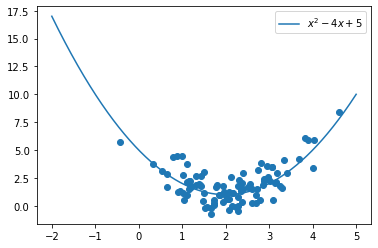

In [107]:
fig = plt.figure(figsize=(6, 4))
plt.scatter(X, Y)
Xtest = np.linspace(-2, 5, 1000).reshape(1000, 1)
Ytest = Xtest**2 - 4 * Xtest + 5
plt.plot(Xtest, Ytest, label=r"$x^2 - 4x + 5$")
plt.legend()
plt.show()

## Normal Equation (or almost)

We need to choose $W:$

$$ XW = Y $$

in order to minimize the loss function:

$$ Loss = (\hat{Y} - Y)^2 = \| XW - Y \|^2_2 = (XW - Y)^T (XW - Y) $$

$$ \frac{dL}{dW} = 0 $$

$$ \boxed{W = (X^T X)^{-1} X^T Y} $$

sklearn doesn't have the normal equation but it has a similar alternative: LinearRegression

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
# Ordinary least squares Linear Regression.
lr = LinearRegression()

# Fit linear model.
lr.fit(X, Y)

# Predict using the linear model.
ypred = lr.predict(X)

In [6]:
lr.intercept_, lr.coef_

(array([1.07268629]), array([[0.42301268]]))

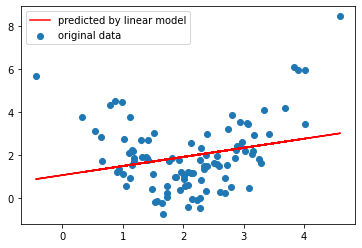

In [7]:
plt.scatter(X, Y, label="original data")
plt.plot(X, ypred, label="predicted by linear model", c='r')
plt.legend()
plt.show()

### Polynomial Features and Overfitting

Polynomial features are those features created by raising existing features to an exponent.

For example, if a dataset had one input feature X, then a polynomial feature would be the addition of a new feature (column) where values were calculated by squaring the values in X, e.g. X^2. This process can be repeated for each input variable in the dataset, creating a transformed version of each.

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [117]:
deg = 15
# Generate a new feature matrix consisting of all polynomial 
# combinations of the features with degree less than or equal
# to the specified degree. For example, if an input sample is
# two dimensional and of the form [a, b], the degree-2 polynomial
# features are [1, a, b, a^2, ab, b^2].
pf = PolynomialFeatures(degree=deg)

# Fit to data, then transform it.
Xpoly = pf.fit_transform(X)

Xtest = np.linspace(-2, 5, 1000).reshape(1000, 1)
Xtest_poly = pf.transform(Xtest)

In [118]:
X.shape, Xpoly.shape

((100, 1), (100, 16))

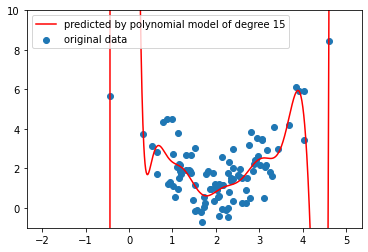

In [119]:
lr = LinearRegression()
lr.fit(Xpoly, Y)
ypred = lr.predict(Xtest_poly)
ytrain_pred = lr.predict(Xpoly)

fig = plt.figure(figsize=(6, 4))
plt.scatter(X, Y, label="original data")
plt.plot(Xtest, ypred, c='r', label=f"predicted by polynomial model of degree {deg}")
plt.ylim(-1, 10)
plt.legend()
plt.show()

### Ridge Regularization

The increase in flexibility of a model is represented by increase in its coefficients, and if we want to minimize the above function, then these coefficients need to be small. This is how the Ridge regression technique prevents coefficients from rising too high.

$$ L = \| XW - Y \|^2 + \lambda^2 \| W \|_2^2 $$

When $\lambda = 0$, the penalty term has no eﬀect, and the estimates produced by ridge regression will be equal to least squares. However, as $\lambda \to \infty$, the impact of the shrinkage penalty grows, and the ridge regression coeﬃcient estimates will approach zero. 

In [12]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

In [127]:
alpha = [1e-3, 1e-2, 1e-1, 1, 10, 100]
ridge = []
ypred = []
for i in range(len(alpha)):
    ridge.append(Ridge(alpha=alpha[i], normalize=True))
    ridge[i].fit(Xpoly, Y)
    ypred.append(ridge[i].predict(Xtest_poly))

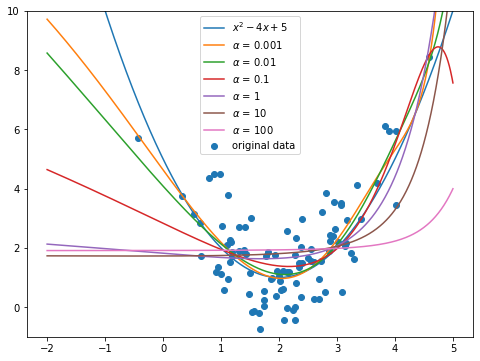

In [128]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(X, Y, label="original data")
plt.plot(np.ravel(Xtest), np.ravel(Ytest), label=r"$x^2 - 4x + 5$")

for i in range(len(alpha)):
    plt.plot(Xtest, ypred[i], label=fr"$\alpha$ = {alpha[i]}")

plt.ylim(-1, 10)
plt.legend()
plt.show()

We need to pay attention to these coefficients
because we won't always have a visual graph of
our data and the prediction. If we see that
there are many higher order big coefficients,
then it is probably overfitting:

In [90]:
ridge[len(alpha) - 1].coef_

array([[ 0.00000000e+00, -6.12863150e-02, -5.99978522e-02,
        -8.07299115e-02, -8.32612680e-02, -7.80385848e-02,
        -5.32498245e-02, -1.40521966e-02,  2.48412491e-02,
         3.43698270e-02,  1.12341363e-03, -2.79410636e-02,
         1.55691880e-02, -3.60884801e-03,  3.84379228e-04,
        -1.51501307e-05]])

### Lasso Regularization

Same as Ridge, but we use L1 norm.

This type of regularization (L1) can lead to zero coefficients i.e. some of the features are completely neglected for the evaluation of output. So Lasso regression not only helps in reducing over-fitting but it can help us in feature selection.

$$ L = \| XW - Y \|^2 + \lambda^2 \| W \|_1^2 $$

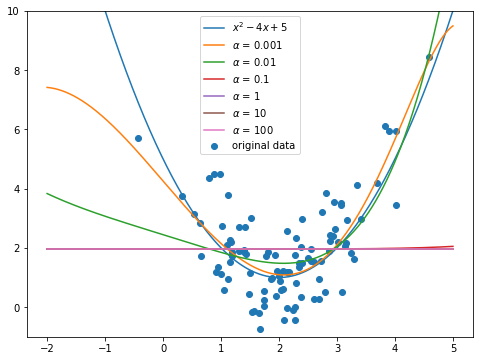

In [130]:
lasso = []
ypred = []

for i in range(len(alpha)):
    lasso.append(Lasso(alpha=alpha[i], max_iter=1e5, normalize=True))
    lasso[i].fit(Xpoly, Y)
    ypred.append(lasso[i].predict(Xtest_poly))

fig = plt.figure(figsize=(8, 6))
plt.scatter(X, Y, label="original data")
plt.plot(np.ravel(Xtest), np.ravel(Ytest), label=r"$x^2 - 4x + 5$")

for i in range(len(alpha)):
    plt.plot(Xtest, ypred[i], label=fr"$\alpha$ = {alpha[i]}")

plt.ylim(-1, 10)
plt.legend()
plt.show()

### Ridge regularization with built-in cross-validation.

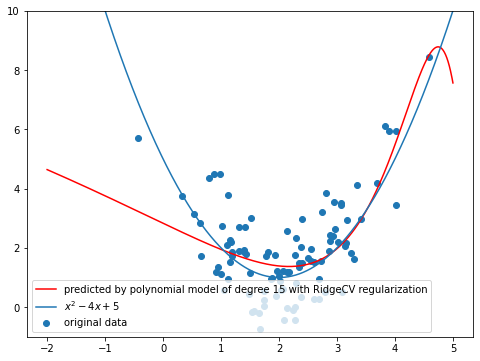

In [110]:
## (didn't work without normalization)
ridgeCV = RidgeCV(alphas=alpha, normalize=True)
ridgeCV.fit(Xpoly, Y)
ypred = ridgeCV.predict(Xtest_poly)

fig = plt.figure(figsize=(8, 6))
plt.scatter(X, Y, label="original data")
plt.plot(Xtest, ypred, c='r', label=fr"predicted by polynomial model of degree {deg} with RidgeCV regularization")
plt.plot(Xtest, Ytest, label=r"$x^2 - 4x + 5$")
plt.ylim(-1, 10)
plt.legend()
plt.show()

### Lasso regularization with built-in cross-validation.

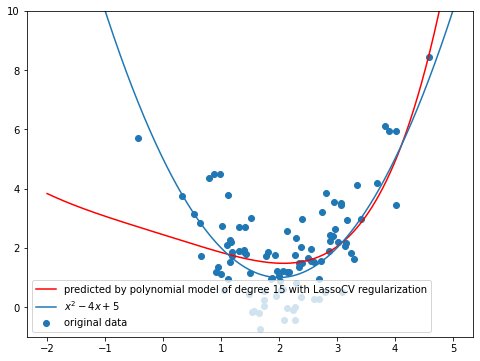

In [109]:
lassoCV = LassoCV(alphas=alpha, max_iter=1e4, normalize=True)
lassoCV.fit(Xpoly, np.ravel(Y))
ypred = lassoCV.predict(Xtest_poly)

fig = plt.figure(figsize=(8, 6))
plt.scatter(X, Y, label="original data")
plt.plot(Xtest, ypred, c='r', label=fr"predicted by polynomial model of degree {deg} with LassoCV regularization")
plt.plot(Xtest, Ytest, label=r"$x^2 - 4x + 5$")
plt.ylim(-1, 10)
plt.legend()
plt.show()

### ElasticNetCV

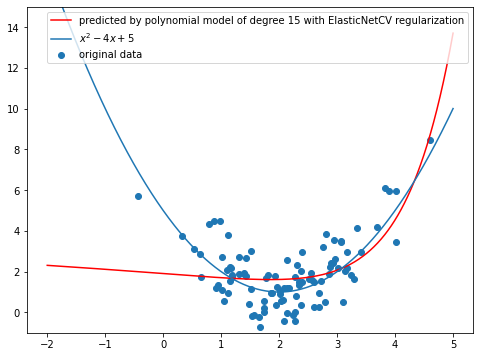

In [113]:
elasticNetCV = ElasticNetCV(l1_ratio=0.6, alphas=alpha, max_iter=1e5, normalize=True)
elasticNetCV.fit(Xpoly, np.ravel(Y))
ypred = elasticNetCV.predict(Xtest_poly)

fig = plt.figure(figsize=(8, 6))
plt.scatter(X, Y, label="original data")
plt.plot(Xtest, ypred, c='r', label=fr"predicted by polynomial model of degree {deg} with ElasticNetCV regularization")
plt.plot(Xtest, Ytest, label=r"$x^2 - 4x + 5$")
plt.ylim(-1, 15)
plt.legend()
plt.show()

In [102]:
elasticNetCV.coef_

array([ 0.00000000e+00, -2.13552161e-01,  0.00000000e+00,  6.68168691e-03,
        2.84219754e-03,  7.29536722e-04,  1.52812932e-04,  2.79353357e-05,
        4.48411515e-06,  5.97620361e-07,  4.93203144e-08,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00])